## Exploratory Data Analysis on MS-COCO style datasets

In [14]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pdb
import os
from pycocotools.coco import COCO
from skimage import io

font = {'family': 'Arial',
        'weight': 'normal',
        'size': 12}

matplotlib.rc('font', **font)

## Setting the root directory and annotation json file

In [34]:
CLASSES = ['__background__', '1_puffed_food', '2_puffed_food', '3_puffed_food', '4_puffed_food', '5_puffed_food',
           '6_puffed_food', '7_puffed_food',
           '8_puffed_food', '9_puffed_food', '10_puffed_food', '11_puffed_food', '12_puffed_food', '13_dried_fruit',
           '14_dried_fruit', '15_dried_fruit',
           '16_dried_fruit', '17_dried_fruit', '18_dried_fruit', '19_dried_fruit', '20_dried_fruit',
           '21_dried_fruit', '22_dried_food', '23_dried_food',
           '24_dried_food', '25_dried_food', '26_dried_food', '27_dried_food', '28_dried_food', '29_dried_food',
           '30_dried_food', '31_instant_drink',
           '32_instant_drink', '33_instant_drink', '34_instant_drink', '35_instant_drink', '36_instant_drink',
           '37_instant_drink', '38_instant_drink',
           '39_instant_drink', '40_instant_drink', '41_instant_drink', '42_instant_noodles', '43_instant_noodles',
           '44_instant_noodles',
           '45_instant_noodles', '46_instant_noodles', '47_instant_noodles', '48_instant_noodles',
           '49_instant_noodles', '50_instant_noodles',
           '51_instant_noodles', '52_instant_noodles', '53_instant_noodles', '54_dessert', '55_dessert',
           '56_dessert', '57_dessert', '58_dessert',
           '59_dessert', '60_dessert', '61_dessert', '62_dessert', '63_dessert', '64_dessert', '65_dessert',
           '66_dessert', '67_dessert', '68_dessert',
           '69_dessert', '70_dessert', '71_drink', '72_drink', '73_drink', '74_drink', '75_drink', '76_drink',
           '77_drink', '78_drink', '79_alcohol',
           '80_alcohol', '81_drink', '82_drink', '83_drink', '84_drink', '85_drink', '86_drink', '87_drink',
           '88_alcohol', '89_alcohol', '90_alcohol',
           '91_alcohol', '92_alcohol', '93_alcohol', '94_alcohol', '95_alcohol', '96_alcohol', '97_milk', '98_milk',
           '99_milk', '100_milk', '101_milk',
           '102_milk', '103_milk', '104_milk', '105_milk', '106_milk', '107_milk', '108_canned_food',
           '109_canned_food', '110_canned_food',
           '111_canned_food', '112_canned_food', '113_canned_food', '114_canned_food', '115_canned_food',
           '116_canned_food', '117_canned_food',
           '118_canned_food', '119_canned_food', '120_canned_food', '121_canned_food', '122_chocolate',
           '123_chocolate', '124_chocolate', '125_chocolate',
           '126_chocolate', '127_chocolate', '128_chocolate', '129_chocolate', '130_chocolate', '131_chocolate',
           '132_chocolate', '133_chocolate', '134_gum',
           '135_gum', '136_gum', '137_gum', '138_gum', '139_gum', '140_gum', '141_gum', '142_candy', '143_candy',
           '144_candy', '145_candy', '146_candy',
           '147_candy', '148_candy', '149_candy', '150_candy', '151_candy', '152_seasoner', '153_seasoner',
           '154_seasoner', '155_seasoner', '156_seasoner',
           '157_seasoner', '158_seasoner', '159_seasoner', '160_seasoner', '161_seasoner', '162_seasoner',
           '163_seasoner', '164_personal_hygiene',
           '165_personal_hygiene', '166_personal_hygiene', '167_personal_hygiene', '168_personal_hygiene',
           '169_personal_hygiene', '170_personal_hygiene',
           '171_personal_hygiene', '172_personal_hygiene', '173_personal_hygiene', '174_tissue', '175_tissue',
           '176_tissue', '177_tissue', '178_tissue',
           '179_tissue', '180_tissue', '181_tissue', '182_tissue', '183_tissue', '184_tissue', '185_tissue',
           '186_tissue', '187_tissue', '188_tissue',
           '189_tissue', '190_tissue', '191_tissue', '192_tissue', '193_tissue', '194_stationery', '195_stationery',
           '196_stationery', '197_stationery',
           '198_stationery', '199_stationery', '200_stationery']

src_file = 'D:/datasets/retail_product_checkout/instances_val2019.json'
src_desc = 'D:/datasets/retail_product_checkout/val2019'  # a name (identifier) for the dataset

coco_obj = COCO(src_file)

loading annotations into memory...
Done (t=0.57s)
creating index...
index created!


In [16]:
# Reading the json file
with open(src_file, 'r') as f:
    root = json.load(f)

root.keys()

dict_keys(['info', 'licenses', 'categories', '__raw_Chinese_name_df', 'images', 'annotations'])

## Basic High Level Information

In [17]:
# Basic High Level Information

n_images = len(root['images'])
n_boxes = len(root['annotations'])
n_categ = len(root['categories'])

# height, width
heights = [x['height'] for x in root['images']]
widths = [x['width'] for x in root['images']]

print('Dataset Name: ', src_desc)
print('Number of images: ', n_images)
print('Number of bounding boxes: ', n_boxes)
print('Number of classes: ', n_categ)
print('Max min avg height: ', max(heights), min(heights), int(sum(heights) / len(heights)))
print('Max min avg width: ', max(widths), min(widths), int(sum(widths) / len(widths)))

Dataset Name:  D:\datasets\retail_product_checkout\val2019
Number of images:  6000
Number of bounding boxes:  73602
Number of classes:  200
Max min avg height:  1887 1751 1830
Max min avg width:  1887 1751 1830


## Distribution of objects across images

In [18]:
# Objects per image distribution

img2nboxes = {}  # mapping "image id" to "number of boxes"

for ann in root['annotations']:
    img_id = ann['image_id']

    if img_id in img2nboxes.keys():
        img2nboxes[img_id] += 1
    else:
        img2nboxes[img_id] = 1

nboxes_list = list(img2nboxes.values())

min_nboxes = min(nboxes_list)
max_nboxes = max(nboxes_list)
avg_nboxes = int(sum(nboxes_list) / len(nboxes_list))

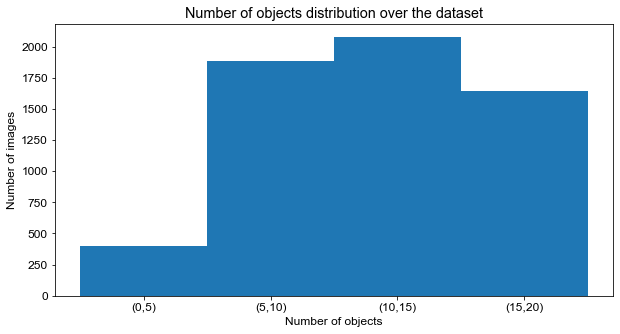

Number of images having atleast one box:  6000
Min number of boxes per image:  4
Max number of boxes per image:  20
Avg number of boxes per image:  12


In [23]:
out = pd.cut(nboxes_list, bins=np.arange(0, max_nboxes + 5, 5), include_lowest=True)

counts = out.value_counts().values
labels = [(int(i.left), int(i.right)) for i in out.value_counts().index.categories]

graph_xind = [i[0] for i in labels]
ticks = ['(' + str(i[0]) + ',' + str(i[1]) + ')' for i in labels]

plt.figure(figsize=(10, 5))
plt.bar(graph_xind, counts, tick_label=ticks, width=5)
plt.xlabel('Number of objects')
plt.ylabel('Number of images')
plt.title('Number of objects distribution over the dataset')
plt.show()

print("Number of images having atleast one box: ", len(nboxes_list))
print("Min number of boxes per image: ", min_nboxes)
print("Max number of boxes per image: ", max_nboxes)
print("Avg number of boxes per image: ", avg_nboxes)

## Class wise distribution of objects

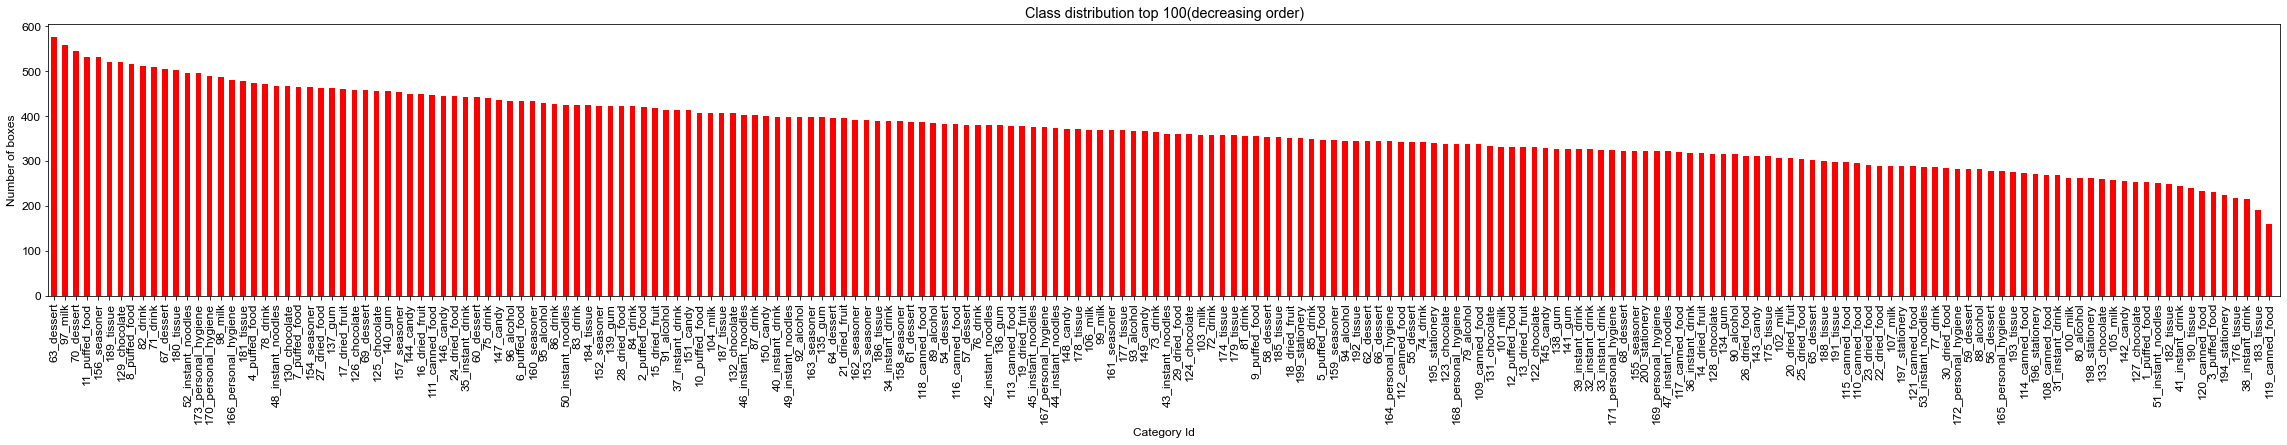

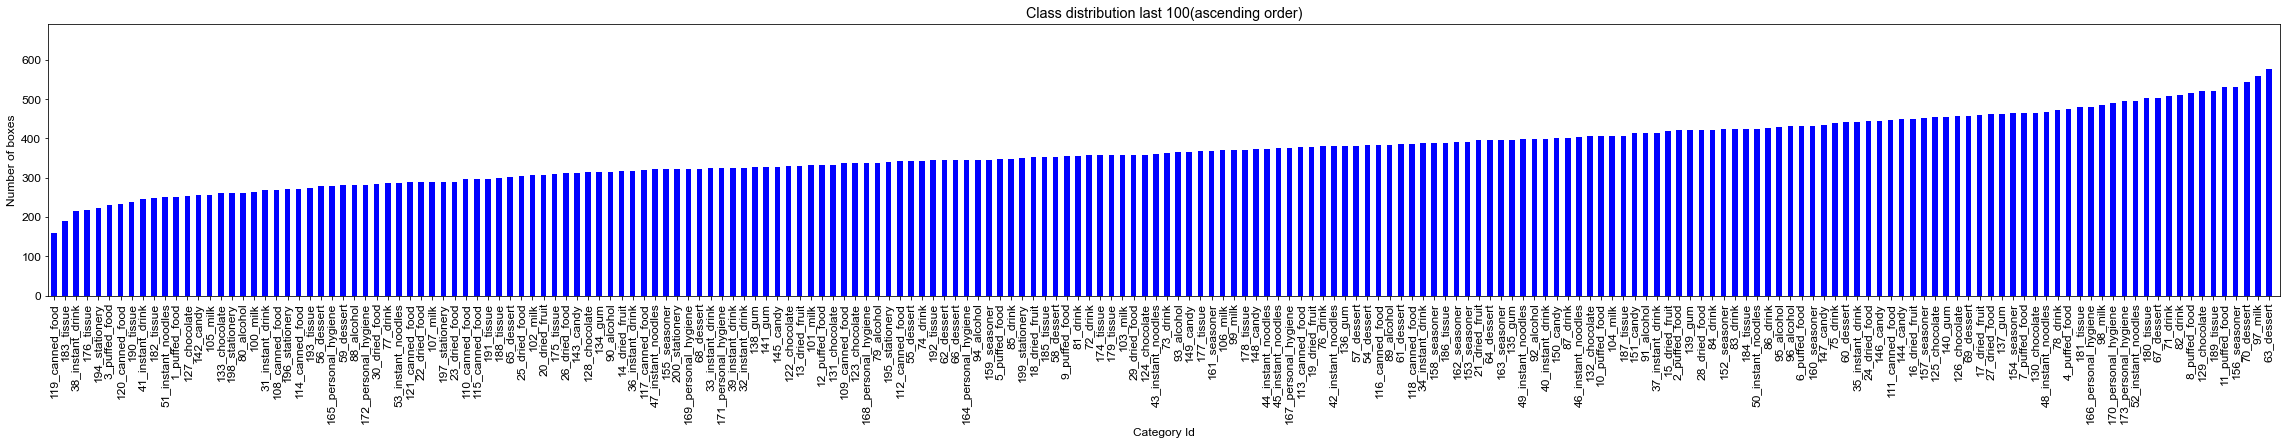

In [50]:
# Class distribution
class2nboxes = {}
nboxes_list_by_catID = [0] * 201
for ann in root['annotations']:
    cat_id = ann['category_id']
    nboxes_list_by_catID[cat_id] += 1
    if CLASSES[cat_id] in class2nboxes.keys():
        class2nboxes[CLASSES[cat_id]] += 1
    else:
        class2nboxes[CLASSES[cat_id]] = 1

desc_sorted_c2nb = [(k, v) for k, v in sorted(class2nboxes.items(), reverse=True, key=lambda item: item[1])]
asce_sorted_c2nb = [(k, v) for k, v in sorted(class2nboxes.items(), reverse=False, key=lambda item: item[1])]

# top 20 classes
cnt = 100
top = min(len(desc_sorted_c2nb), 200)
buttom = min(len(asce_sorted_c2nb), 200)

# to plot top
y = [i[1] for i in desc_sorted_c2nb[:top]]
x = [i[0] for i in desc_sorted_c2nb[:top]]

plt.figure(figsize=(40, 5))
plt.xticks(rotation='vertical')
plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x, color='red')
plt.xlim(-0.5, len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution top 100(decreasing order)')
plt.show()

# to plot bottom
y = [i[1] for i in asce_sorted_c2nb[:top]]
x = [i[0] for i in asce_sorted_c2nb[:top]]

plt.figure(figsize=(40, 5))
plt.xticks(rotation='vertical')
plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x, color='blue')
plt.xlim(-0.5, len(y))
plt.xlabel('Category Id')
plt.ylabel('Number of boxes')
plt.title('Class distribution last 100(ascending order)')
plt.margins(0.2)
plt.show()

# categ_map = {x['id']: x['name'] for x in root['categories']}
# for k in categ_map.keys():
#     print(k, '->', categ_map[k], end=", ")

In [58]:
from scipy.stats.stats import pearsonr

mAP_df = pd.read_excel("C:/Users/newia/Desktop/mmdetection訓練結果/rpc_origin/20220320_203513/mAP.xlsx")
mAP_df['indexNumber'] = [int(i.split('_', 1)[0]) for i in mAP_df.Category]
mAP_df = mAP_df.sort_values(by=['indexNumber'])
mAP_list = mAP_df['mAP'].tolist()
# mAP_list = [int(i * 100) for i in mAP_list]
nboxes_list_by_catID = [round(i/max(nboxes_list_by_catID), 3) for i in nboxes_list_by_catID]
print(pearsonr(mAP_list, nboxes_list_by_catID[1:]))

(0.055227816518336185, 0.43731411186475777)


## Class wise bounding box area distribution

In [56]:
# Class wise bounding box area distribution

bbox_areas = {}  # key: class index, value -> a list of bounding box areas

for ann in root['annotations']:
    area = ann['area']
    cat_id = ann['category_id']

    if area <= 0.0:
        continue

    if cat_id in bbox_areas.keys():
        bbox_areas[cat_id].append(area)
    else:
        bbox_areas[cat_id] = [area]

bbox_avg_areas = []
bbox_areas_list_by_catID = [0] * 201
for cat in bbox_areas.keys():
    areas = bbox_areas[cat]
    avg_area = int(sum(areas) / len(areas))

    bbox_avg_areas.append((cat, avg_area))
    bbox_areas_list_by_catID[cat] = avg_area
bbox_avg_areas = sorted(bbox_avg_areas, key=lambda x: x[1])


In [57]:
from scipy.stats.stats import pearsonr

mAP_df = pd.read_excel("C:/Users/newia/Desktop/mmdetection訓練結果/rpc_origin/20220320_203513/mAP.xlsx")
mAP_df['indexNumber'] = [int(i.split('_', 1)[0]) for i in mAP_df.Category]
mAP_df = mAP_df.sort_values(by=['indexNumber'])
mAP_list = mAP_df['mAP'].tolist()
# mAP_list = [int(i * 100) for i in mAP_list]
bbox_areas_list_by_catID = [round(i/max(bbox_areas_list_by_catID), 3) for i in bbox_areas_list_by_catID]
print(pearsonr(mAP_list, bbox_areas_list_by_catID[1:]))

(0.21977836465117584, 0.0017661435126472443)


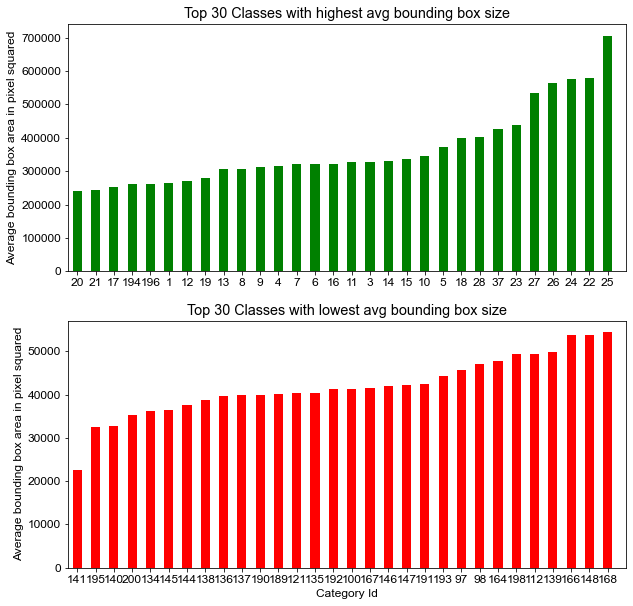

1 -> 1_puffed_food, 2 -> 2_puffed_food, 3 -> 3_puffed_food, 4 -> 4_puffed_food, 5 -> 5_puffed_food, 6 -> 6_puffed_food, 7 -> 7_puffed_food, 8 -> 8_puffed_food, 9 -> 9_puffed_food, 10 -> 10_puffed_food, 11 -> 11_puffed_food, 12 -> 12_puffed_food, 13 -> 13_dried_fruit, 14 -> 14_dried_fruit, 15 -> 15_dried_fruit, 16 -> 16_dried_fruit, 17 -> 17_dried_fruit, 18 -> 18_dried_fruit, 19 -> 19_dried_fruit, 20 -> 20_dried_fruit, 21 -> 21_dried_fruit, 22 -> 22_dried_food, 23 -> 23_dried_food, 24 -> 24_dried_food, 25 -> 25_dried_food, 26 -> 26_dried_food, 27 -> 27_dried_food, 28 -> 28_dried_food, 29 -> 29_dried_food, 30 -> 30_dried_food, 31 -> 31_instant_drink, 32 -> 32_instant_drink, 33 -> 33_instant_drink, 34 -> 34_instant_drink, 35 -> 35_instant_drink, 36 -> 36_instant_drink, 37 -> 37_instant_drink, 38 -> 38_instant_drink, 39 -> 39_instant_drink, 40 -> 40_instant_drink, 41 -> 41_instant_drink, 42 -> 42_instant_noodles, 43 -> 43_instant_noodles, 44 -> 44_instant_noodles, 45 -> 45_instant_noodles,

In [12]:
top = min(30, len(bbox_avg_areas))

plt.figure(figsize=(10, 10))

y = [item[1] for item in bbox_avg_areas[-top:]]
x = [item[0] for item in bbox_avg_areas[-top:]]

y2 = [item[1] for item in bbox_avg_areas[:top]]
x2 = [item[0] for item in bbox_avg_areas[:top]]

plt.subplot(211)
plt.bar(np.arange(len(y)), y, width=0.5, tick_label=x, color='green')
plt.xlim(-0.5, len(y))
# plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top ' + str(top) + ' Classes with highest avg bounding box size')

plt.subplot(212)
plt.bar(np.arange(len(y2)), y2, width=0.5, tick_label=x2, color='red')
plt.xlim(-0.5, len(y2))
plt.xlabel('Category Id')
plt.ylabel('Average bounding box area in pixel squared')
plt.title('Top ' + str(top) + ' Classes with lowest avg bounding box size')
plt.show()

categ_map = {x['id']: x['name'] for x in root['categories']}
for k in categ_map.keys():
    print(k, '->', categ_map[k], end=", ")

## Viewing random images

['29_dried_food', '29_dried_food', '82_drink', '7_puffed_food', '159_seasoner', '29_dried_food', '7_puffed_food', '7_puffed_food']


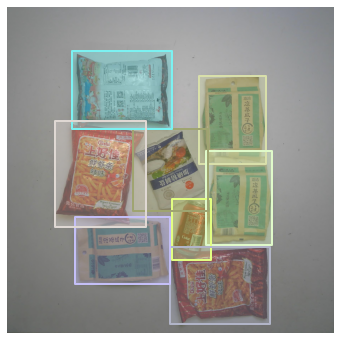

In [10]:
# generate a random image
imgIds = [i['id'] for i in root['images']]
catIds = [i['id'] for i in root['categories']]
img = coco_obj.loadImgs(imgIds[np.random.randint(0, len(imgIds))])[0]
img_path = os.path.join(src_desc, img['file_name'])
I = io.imread(img_path)

# plot annotations
plt.figure(figsize=(6, 6))
plt.axis('off')
plt.imshow(I)
annIds = coco_obj.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_obj.loadAnns(annIds)

#  disable segmentation
for a in anns:
    if 'segmentation' in a.keys():
        a['segmentation'] = []
coco_obj.showAnns(anns, draw_bbox=True)
# classes = [categ_map[a['category_id']] for a in anns]
# print(classes)